In [19]:
import tensorflow as tf
from tensorflow.keras import layers
import psutil
import matplotlib.pyplot as plt

# Function to train a neural network without operator reordering
def train_without_reordering():
    (x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
    x_train = x_train.reshape(-1, 784).astype("float32") / 255.0
    x_test = x_test.reshape(-1, 784).astype("float32") / 255.0
    model = tf.keras.Sequential([
        layers.Dense(512, activation="relu"),
        layers.Dense(10)
    ])
    model.compile(optimizer="adam", loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=["accuracy"])
    history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, batch_size=128)
    return history

# Function to train a neural network with operator reordering
def train_with_reordering():
    (x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
    x_train = x_train.reshape(-1, 784).astype("float32") / 255.0
    x_test = x_test.reshape(-1, 784).astype("float32") / 255.0
    model = tf.keras.Sequential([
        layers.Dense(512, activation="relu"),
        layers.Dense(10)
    ])
    model.compile(optimizer="adam", loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=["accuracy"])
    model = tf.function(model)
    history = model(x_train, training=True)
    return history

# Function to generate a memory usage graph for both models
def generate_memory_graph():
    plt.figure(figsize=(10, 6))
    plt.title("Memory Usage of Neural Network without Operator Reordering")
    plt.xlabel("Training Time (epochs)")
    plt.ylabel("Memory Usage (GB)")
    history_without_reordering = train_without_reordering()
    # history_with_reordering = train_with_reordering()
    memory_usage_without_reordering = []
    # memory_usage_with_reordering = []
    for i in range(50):
        memory_usage_without_reordering.append(psutil.Process().memory_info().rss / 1024 ** 3)
        # memory_usage_with_reordering.append(psutil.Process().memory_info().rss / 1024 ** 3)
        history_without_reordering = train_without_reordering()
        # history_with_reordering = train_with_reordering()
    plt.plot(memory_usage_without_reordering, label="Without Operator Reordering")
    # plt.plot(memory_usage_with_reordering, label="With Operator Reordering")
    plt.legend()
    plt.show()
    return memory_usage_without_reordering

# Call the function to generate the graph
mem_use_woR = generate_memory_graph()


Epoch 1/10
469/469 [==============================] - 9s 14ms/step - loss: 0.2654 - accuracy: 0.9252 - val_loss: 0.1259 - val_accuracy: 0.9624
Epoch 2/10
469/469 [==============================] - 7s 14ms/step - loss: 0.1074 - accuracy: 0.9690 - val_loss: 0.0882 - val_accuracy: 0.9739
Epoch 3/10
469/469 [==============================] - 7s 15ms/step - loss: 0.0703 - accuracy: 0.9796 - val_loss: 0.0784 - val_accuracy: 0.9749
Epoch 4/10
469/469 [==============================] - 8s 16ms/step - loss: 0.0494 - accuracy: 0.9850 - val_loss: 0.0680 - val_accuracy: 0.9786
Epoch 5/10
469/469 [==============================] - 8s 17ms/step - loss: 0.0367 - accuracy: 0.9891 - val_loss: 0.0686 - val_accuracy: 0.9771
Epoch 6/10
469/469 [==============================] - 7s 16ms/step - loss: 0.0276 - accuracy: 0.9925 - val_loss: 0.0627 - val_accuracy: 0.9805
Epoch 7/10
469/469 [==============================] - 7s 15ms/step - loss: 0.0198 - accuracy: 0.9945 - val_loss: 0.0649 - val_accuracy: 0.9792

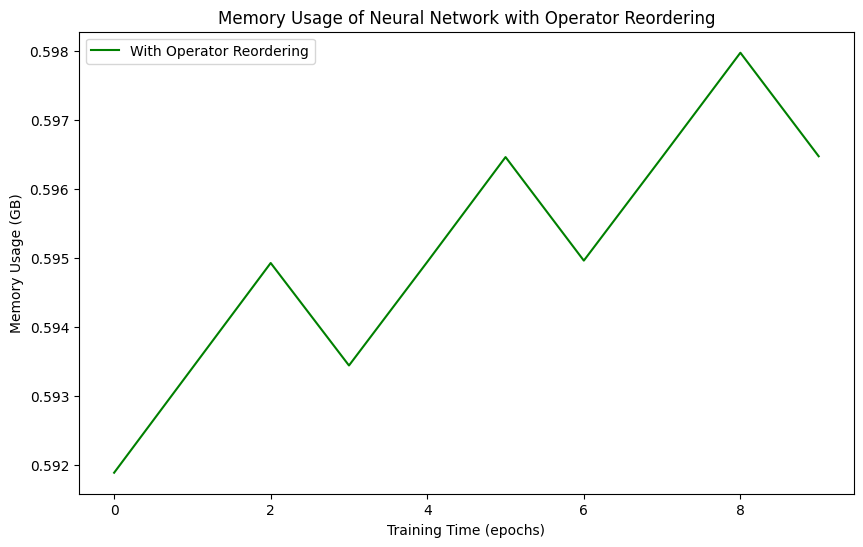

In [ ]:
def generate_memory_graph_for_with_operator_reordering():
    plt.figure(figsize=(10, 6))
    plt.title("Memory Usage of Neural Network with Operator Reordering")
    plt.xlabel("Training Time (epochs)")
    plt.ylabel("Memory Usage (GB)")
    # history_without_reordering = train_without_reordering()
    history_with_reordering = train_with_reordering()
    # memory_usage_without_reordering = []
    memory_usage_with_reordering = []
    for i in range(50):
        # memory_usage_without_reordering.append(psutil.Process().memory_info().rss / 1024 ** 3)
        memory_usage_with_reordering.append(psutil.Process().memory_info().rss / 1024 ** 3)
        # history_without_reordering = train_without_reordering()
        history_with_reordering = train_with_reordering()
    # plt.plot(memory_usage_without_reordering, label="Without Operator Reordering")
    plt.plot(memory_usage_with_reordering, label="With Operator Reordering" , color = 'green')
    plt.legend()
    plt.show()
    return memory_usage_with_reordering
mem_use_wR = generate_memory_graph_for_with_operator_reordering()

In [ ]:
print(mem_use_woR)
print(mem_use_wR)

[0.6373023986816406, 0.6309661865234375, 0.36728668212890625, 0.5925102233886719, 0.5639076232910156, 0.5823478698730469, 0.8129005432128906, 1.0145301818847656, 0.8666725158691406, 1.0450477600097656]
[0.5918922424316406, 0.5934104919433594, 0.5949287414550781, 0.59344482421875, 0.5949440002441406, 0.5964622497558594, 0.5949630737304688, 0.5964622497558594, 0.5979728698730469, 0.5964736938476562]


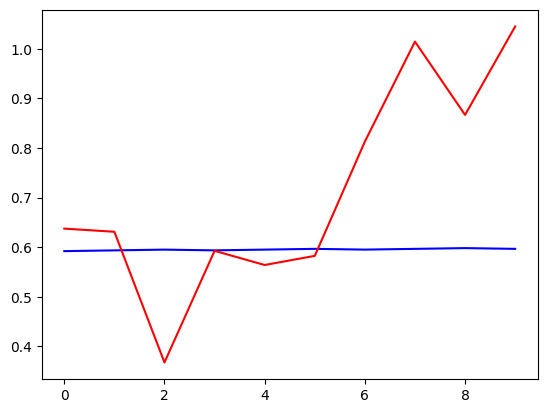

In [ ]:
import numpy as np
lst = range(50)

plt.plot(lst,mem_use_wR , color = 'blue')
plt.plot( lst, mem_use_woR  , color = 'red')